In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('sp_emx1_all_features_withlabels.csv')
dna=pd.read_csv('sp_emx1_onlyDNA_features_withlabels.csv')
prot=pd.read_csv('sp_emx1_only_protein_withlabels.csv')
data.head()

,States,Label,System,sys-labels,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,0,Sp_native-1,Sp_native,0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,...,66,0,688,0,45,0,473,0,729,0
1,0,Sp_native-2,Sp_native,0,-1.9958,-0.4045,-0.7358,-17.7083,0.1685,-1.8600,...,50,40,522,142,30,5,366,167,500,269
2,0,Sp_native-3,Sp_native,0,-2.0316,-0.4997,-0.2185,-25.4601,7.6702,-3.4554,...,60,35,503,118,34,0,329,160,483,235
3,0,Sp_native-4,Sp_native,0,-2.3158,-0.4664,-0.8223,-24.1637,-4.7962,-6.8853,...,53,36,466,105,35,15,356,165,536,279
4,0,Sp_native-5,Sp_native,0,-2.4491,-0.4488,-0.7102,-24.5353,0.4794,-6.3136,...,50,49,448,115,34,20,333,161,496,271


In [4]:
dna.columns

Index(['sp_all_bp20_shear', 'sp_all_bp20_stretch', 'sp_all_bp20_stagger',
       'sp_all_bp20_buckle', 'sp_all_bp20_propeller', 'sp_all_bp20_opening',
       'sp_all_bp19_shear', 'sp_all_bp19_stretch', 'sp_all_bp19_stagger',
       'sp_all_bp19_buckle', 'sp_all_bp19_propeller', 'sp_all_bp19_opening',
       'sp_all_bp18_shear', 'sp_all_bp18_stretch', 'sp_all_bp18_stagger',
       'sp_all_bp18_buckle', 'sp_all_bp18_propeller', 'sp_all_bp18_opening',
       'sp_all_bp17_shear', 'sp_all_bp17_stretch', 'sp_all_bp17_stagger',
       'sp_all_bp17_buckle', 'sp_all_bp17_propeller', 'sp_all_bp17_opening',
       'Label', 'States', 'System', 'sys-labels'],
      dtype='object')

In [5]:
data.columns

Index(['States', 'Label', 'System', 'sys-labels', 'sp_all_bp20_shear',
       'sp_all_bp20_stretch', 'sp_all_bp20_stagger', 'sp_all_bp20_buckle',
       'sp_all_bp20_propeller', 'sp_all_bp20_opening', 'sp_all_bp19_shear',
       'sp_all_bp19_stretch', 'sp_all_bp19_stagger', 'sp_all_bp19_buckle',
       'sp_all_bp19_propeller', 'sp_all_bp19_opening', 'sp_all_bp18_shear',
       'sp_all_bp18_stretch', 'sp_all_bp18_stagger', 'sp_all_bp18_buckle',
       'sp_all_bp18_propeller', 'sp_all_bp18_opening', 'sp_all_bp17_shear',
       'sp_all_bp17_stretch', 'sp_all_bp17_stagger', 'sp_all_bp17_buckle',
       'sp_all_bp17_propeller', 'sp_all_bp17_opening', 'Angle', 'RMSD', 'SASA',
       'ROG', 'sgRNA-tDNA cont', 'LIE', 'Sp-ntDNA-tDNA_native',
       'Sp-ntDNA-tDNA-RuvC_non-native', 'Sp-hy-HNH_native',
       'Sp-hy-HNH_non-native', 'Sp-hy-REC1_native', 'Sp-hy-REC1_non-native',
       'Sp-hy-REC2_native', 'Sp-hy-REC2_non-native', 'Sp-hy-REC3_native',
       'Sp-hy-REC3_non-native', 'Sp-hy-RuvC_na

In [7]:
dna_2=data[['sgRNA-tDNA cont','LIE','Sp-ntDNA-tDNA_native','Sp-ntDNA-tDNA-RuvC_non-native','sp_all_bp20_shear',
       'sp_all_bp20_stretch', 'sp_all_bp20_stagger', 'sp_all_bp20_buckle',
       'sp_all_bp20_propeller', 'sp_all_bp20_opening', 'sp_all_bp19_shear',
       'sp_all_bp19_stretch', 'sp_all_bp19_stagger', 'sp_all_bp19_buckle',
       'sp_all_bp19_propeller', 'sp_all_bp19_opening', 'sp_all_bp18_shear',
       'sp_all_bp18_stretch', 'sp_all_bp18_stagger', 'sp_all_bp18_buckle',
       'sp_all_bp18_propeller', 'sp_all_bp18_opening', 'sp_all_bp17_shear',
       'sp_all_bp17_stretch', 'sp_all_bp17_stagger', 'sp_all_bp17_buckle',
       'sp_all_bp17_propeller', 'sp_all_bp17_opening','States']]
dna_2.head()

,sgRNA-tDNA cont,LIE,Sp-ntDNA-tDNA_native,Sp-ntDNA-tDNA-RuvC_non-native,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,...,sp_all_bp18_buckle,sp_all_bp18_propeller,sp_all_bp18_opening,sp_all_bp17_shear,sp_all_bp17_stretch,sp_all_bp17_stagger,sp_all_bp17_buckle,sp_all_bp17_propeller,sp_all_bp17_opening,States
0,929.0,-264.0086,501,0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,...,3.3395,6.6069,6.6553,-0.4333,-0.1624,0.7862,22.2872,31.1506,-1.1153,0
1,438.0,-227.1491,407,50,-1.9958,-0.4045,-0.7358,-17.7083,0.1685,-1.8600,...,9.4951,8.4816,1.7894,-0.1817,-0.0138,0.3989,28.8262,21.5323,2.4665,0
2,485.0,-158.1960,403,66,-2.0316,-0.4997,-0.2185,-25.4601,7.6702,-3.4554,...,16.0667,2.9889,8.3827,0.2144,-0.1480,0.4320,26.4691,31.4329,3.2498,0
3,469.0,-241.4879,413,92,-2.3158,-0.4664,-0.8223,-24.1637,-4.7962,-6.8853,...,-10.7428,-6.8361,1.4399,-0.3056,0.1176,0.0549,21.2694,-5.1252,0.4183,0
4,474.0,-166.2298,388,76,-2.4491,-0.4488,-0.7102,-24.5353,0.4794,-6.3136,...,20.9010,1.5004,4.8472,-0.6259,0.2941,-0.0302,26.4849,21.2806,-4.5027,0


In [8]:
data=data.drop(['Label','System','sys-labels'], axis=1)
data.head()

,States,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,...,66,0,688,0,45,0,473,0,729,0
1,0,-1.9958,-0.4045,-0.7358,-17.7083,0.1685,-1.8600,-0.0620,-2.4507,-0.7269,...,50,40,522,142,30,5,366,167,500,269
2,0,-2.0316,-0.4997,-0.2185,-25.4601,7.6702,-3.4554,-0.1609,2.7666,-0.2383,...,60,35,503,118,34,0,329,160,483,235
3,0,-2.3158,-0.4664,-0.8223,-24.1637,-4.7962,-6.8853,-0.7806,-2.0720,-0.2715,...,53,36,466,105,35,15,356,165,536,279
4,0,-2.4491,-0.4488,-0.7102,-24.5353,0.4794,-6.3136,-0.5629,-1.9565,0.0480,...,50,49,448,115,34,20,333,161,496,271


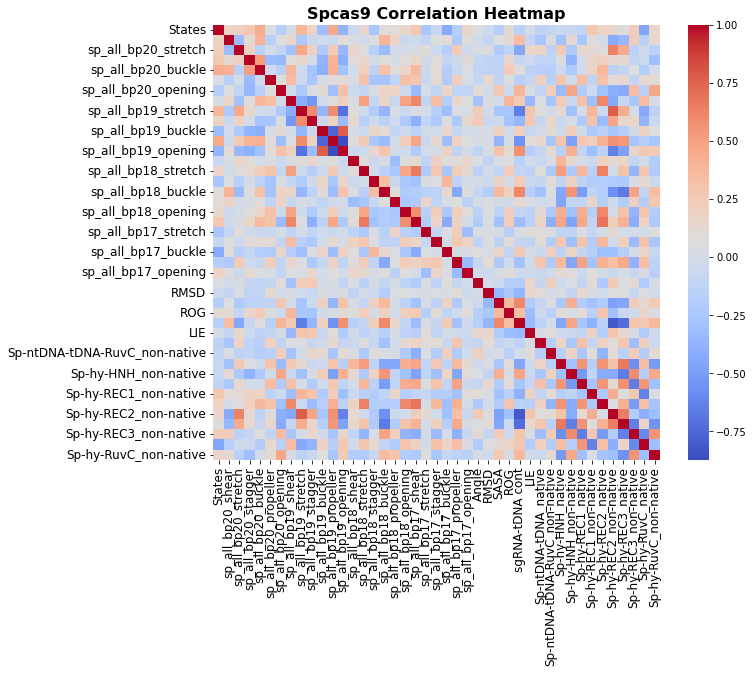

In [9]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Spcas9 Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig('../../figures/SpCas9_all_coor_plot.svg')
plt.show()

In [10]:

# Assuming the dataframe is stored in a variable called 'df'
# You may need to adjust the code if your dataframe has different column names

# Step 1: Prepare the data
# dropping the rows having NaN values
data = data.dropna()
 
# To reset the indices
data = data.reset_index(drop=True)
X = data.iloc[:, 1:]  
y = data['States']    # Assuming 'states' is the target variable column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
y.shape

(57074,)

In [11]:
y.value_counts()

4    29056
3    17186
0    10397
1      430
2        5
Name: States, dtype: int64

In [40]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(45659, 42) (45659,) (11415, 42) (11415,)


In [29]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_sp_all = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_sp_all[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [03:51<15:25, 231.31s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9829606515897542



Grid Search Progress:  40%|████████████████████████████▊                                           | 2/5 [2:05:08<3:38:47, 4375.75s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9840557355452152



Grid Search Progress:  60%|███████████████████████████████████████████▏                            | 3/5 [2:06:21<1:20:22, 2411.36s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.01, 'n_estimators': 100}
Best score for AdaBoostClassifier: 0.8805055030778952



Grid Search Progress:  80%|███████████████████████████████████████████████████████████▏              | 4/5 [2:11:55<26:31, 1591.24s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9837052954381138



Grid Search Progress: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [2:33:31<00:00, 1842.36s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for XGBClassifier: 0.9839900085349162



In [31]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_sp_all[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_sp_all[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_sp_all[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_sp_all[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_sp_all[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest recall:", rf_recall)
print("Gradient Boosting recall:", gb_recall)
print("AdaBoost recall:", ab_recall)
print("Support Vector Machine recall:", svm_recall)
print("XGBoost recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_sp_all_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_sp_all_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_sp_all_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_sp_all_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
sp_all=pd.DataFrame(list(zip(models,grid_sp_all_accuracy,grid_sp_all_precision,grid_sp_all_recall, grid_sp_all_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
sp_all.head()

Random Forest Precision: 0.9844970771562827
Gradient Boosting Precision: 0.9854788064343136
AdaBoost Precision: 0.8745457569670194
Support Vector Machine Precision: 0.9831516948074956
XGBoost Precision: 0.9847068566971233
Random Forest recall: 0.9844064826982041
Gradient Boosting recall: 0.9853701270258431
AdaBoost recall: 0.8729741568112133
Support Vector Machine recall: 0.9831800262812089
XGBoost recall: 0.9846692947875603
Random Forest F1-score: 0.9844061417289731
Gradient Boosting F1-score: 0.9854022154452572
AdaBoost F1-score: 0.8643060653710872
Support Vector Machine F1-score: 0.9831605476879074
XGBoost F1-score: 0.9846586602229379
Random Forest Accuracy: 0.9844064826982041
Gradient Boosting Accuracy: 0.9853701270258431
AdaBoost Accuracy: 0.8729741568112133
Support Vector Machine Accuracy: 0.9831800262812089
XGBoost Accuracy: 0.9846692947875603


,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.984406,0.984497,0.984406,0.984406
1,Gradient Boosting,0.985370,0.985479,0.985370,0.985402
2,ADA Boosting,0.872974,0.874546,0.872974,0.864306
3,Support-vector Machine,0.983180,0.983152,0.983180,0.983161
4,XG-Boost,0.984669,0.984707,0.984669,0.984659


## Protein+DNA RFE feature selection

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE


# Initialize the logistic regression model
model = RandomForestClassifier()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=20)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
sp_all_bp20_shear
sp_all_bp20_stretch
sp_all_bp20_stagger
sp_all_bp20_buckle
sp_all_bp20_opening
sp_all_bp19_buckle
sp_all_bp19_propeller
sp_all_bp19_opening
sp_all_bp18_buckle
sp_all_bp17_shear
sp_all_bp17_buckle
sp_all_bp17_propeller
sgRNA-tDNA cont
Sp-hy-HNH_native
Sp-hy-HNH_non-native
Sp-hy-REC2_native
Sp-hy-REC3_native
Sp-hy-REC3_non-native
Sp-hy-RuvC_native
Sp-hy-RuvC_non-native


In [59]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(45659, 42) (45659,) (11415, 42) (11415,)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train_scaled, y_train)

# Evaluate the logistic regression model
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9748576434515988


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Initialize the logistic regression model with multi_class='ovr'
logreg = LogisticRegression(multi_class='ovr')

# Fit the logistic regression model to the training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print('F1-score', f1)

Precision: 0.9700377142150324
Recall: 0.9701270258431888
F1-score 0.9700585633049834


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hyperparameter Tuning

In [63]:
# Random Forest
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=10,n_jobs=100)
rf_grid.fit(X_train_scaled, y_train)
rf_best_model = rf_grid.best_estimator_

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [64]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gb_grid = GridSearchCV(gb_model, gb_params, cv=10,n_jobs=100)
gb_grid.fit(X_train_scaled, y_train)
gb_best_model = gb_grid.best_estimator_

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [65]:
# AdaBoost
ab_model = AdaBoostClassifier()
ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}
ab_grid = GridSearchCV(ab_model, ab_params, cv=10, n_jobs=100)
ab_grid.fit(X_train_scaled, y_train)
ab_best_model = ab_grid.best_estimator_

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [72]:
# Support Vector Machine
svm_model = SVC()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm_model, svm_params, cv=10, n_jobs=100)
svm_grid.fit(X_train_scaled, y_train)
svm_best_model = svm_grid.best_estimator_


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [67]:
# XGBoost
xgb_model = XGBClassifier()
xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=100)
xgb_grid.fit(X_train_scaled, y_train)
xgb_best_model = xgb_grid.best_estimator_v

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [68]:
grid_rfe_accuracy=[]
grid_rfe_f1=[]
grid_rfe_precision=[]
grid_rfe_recall=[]

# Make predictions on the test set using the best models
rf_pred = rf_best_model.predict(X_test_scaled)
gb_pred = gb_best_model.predict(X_test_scaled)
ab_pred = ab_best_model.predict(X_test_scaled)
svm_pred = svm_best_model.predict(X_test_scaled)
xgb_pred = xgb_best_model.predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Accuracy: 0.9828296101620675
Gradient Boosting Accuracy: 0.9836180464301358
AdaBoost Accuracy: 0.8882172579938677
Support Vector Machine Accuracy: 0.9763469119579501
XGBoost Accuracy: 0.9825667980727113


In [69]:
# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

grid_rfe_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe=pd.DataFrame(list(zip(models,grid_rfe_accuracy,grid_rfe_precision,grid_rfe_recall, grid_rfe_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe.head()

Random Forest Precision: 0.9829057638579743
Gradient Boosting Precision: 0.9837374615969006
AdaBoost Precision: 0.8871157211785279
Support Vector Machine Precision: 0.9763394686640106
XGBoost Precision: 0.9825728556005444
Random Forest Recall: 0.9828296101620675
Gradient Boosting Recall: 0.9836180464301358
AdaBoost Recall: 0.8882172579938677
Support Vector Machine Recall: 0.9763469119579501
XGBoost Recall: 0.9825667980727113
Random Forest F1-score: 0.9828288276917759
Gradient Boosting F1-score: 0.9836512544225039
AdaBoost F1-score: 0.8810917132369486
Support Vector Machine F1-score: 0.9763231426175423
XGBoost F1-score: 0.9825525841266564


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/m

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.982830,0.982906,0.982830,0.982829
1,Gradient Boosting,0.983618,0.983737,0.983618,0.983651
2,ADA Boosting,0.888217,0.887116,0.888217,0.881092
3,Support-vector Machine,0.976347,0.976339,0.976347,0.976323
4,XG-Boost,0.982567,0.982573,0.982567,0.982553


In [70]:
rfe['Models']=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.982830,0.982906,0.982830,0.982829
1,Gradient Boosting,0.983618,0.983737,0.983618,0.983651
2,ADA Boosting,0.888217,0.887116,0.888217,0.881092
3,Support-vector Machine,0.976347,0.976339,0.976347,0.976323
4,XG-Boost,0.982567,0.982573,0.982567,0.982553


In [71]:
# Assuming y_test, rf_pred, gb_pred, ab_pred, svm_pred, and xgb_pred are available

# Create a DataFrame with true labels and predictions
sp_rfe_all = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_rfe_all.to_csv('spcas9_rfe_both_dna-prot.csv', index=False)

In [4]:
### 

df_both = pd.read_csv('spcas9_rfe_both_dna-prot.csv')
df_both.head()

,True Label,Random Forest,Gradient Boosting,AdaBoost,SVM,XGBoost
0,3,3,3,3,3,3
1,4,4,4,4,4,4
2,4,4,4,4,4,4
3,3,3,3,4,3,3
4,4,4,4,4,4,4


In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils import resample
import statistics
#def get_test_metrics(df, models, n_iterations=100, n_size=df.shape[0])
def get_test_metrics(df, models, n_iterations=100):    
    
    master_df = pd.DataFrame()
    n_size=df.shape[0]
    for model_name in models:
        acc = []
        prec = []
        recall = []
        f1 = []

        for i in range(n_iterations):
            test = resample(df, n_samples=n_size or df.shape[0], random_state=i)
            acc.append(accuracy_score(test['True Label'].tolist(), test[model_name].tolist(), normalize=True, sample_weight=None))
            p, r, f, _ = precision_recall_fscore_support(test['True Label'].tolist(), test[model_name].tolist(), average='weighted')
            prec.append(p)
            recall.append(r)
            f1.append(f)

        metrics_dict = {
            f"{model_name}-Accuracy": acc,
            f"{model_name}-Precision": prec,
            f"{model_name}-Recall": recall,
            f"{model_name}-F1 score": f1
        }

        metrics_df = pd.DataFrame(metrics_dict)
        master_df = pd.concat([master_df, metrics_df], axis=1)

    return master_df 


In [13]:
metric_master_df_eval = get_test_metrics(df_both, df_both.columns[1:].to_list())

In [14]:
metric_master_df_eval.to_csv('rfe_bootstrap-2-both-dna-protein.csv', index=False)
metric_master_df_eval

,Random Forest-Accuracy,Random Forest-Precision,Random Forest-Recall,Random Forest-F1 score,Gradient Boosting-Accuracy,Gradient Boosting-Precision,Gradient Boosting-Recall,Gradient Boosting-F1 score,AdaBoost-Accuracy,AdaBoost-Precision,AdaBoost-Recall,AdaBoost-F1 score,SVM-Accuracy,SVM-Precision,SVM-Recall,SVM-F1 score,XGBoost-Accuracy,XGBoost-Precision,XGBoost-Recall,XGBoost-F1 score
0,0.982129,0.982232,0.982129,0.982129,0.983881,0.984049,0.983881,0.983922,0.883662,0.884401,0.883662,0.876482,0.975208,0.975329,0.975208,0.975212,0.982830,0.982862,0.982830,0.982824
1,0.981866,0.981971,0.981866,0.981873,0.983355,0.983410,0.983355,0.983350,0.889531,0.888715,0.889531,0.882770,0.976522,0.976514,0.976522,0.976498,0.982392,0.982428,0.982392,0.982386
2,0.982654,0.982876,0.982654,0.982700,0.982567,0.982720,0.982567,0.982607,0.888743,0.888852,0.888743,0.881869,0.975558,0.975626,0.975558,0.975572,0.981778,0.981943,0.981778,0.981820
3,0.982654,0.982788,0.982654,0.982696,0.983268,0.983445,0.983268,0.983339,0.882611,0.882319,0.882611,0.875967,0.977223,0.977298,0.977223,0.977235,0.981516,0.981574,0.981516,0.981538
4,0.983355,0.983403,0.983355,0.983352,0.983268,0.983293,0.983268,0.983260,0.887604,0.887304,0.887604,0.880406,0.977311,0.977288,0.977311,0.977278,0.982567,0.982563,0.982567,0.982555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.982304,0.982457,0.982304,0.982350,0.983443,0.983546,0.983443,0.983474,0.893912,0.893022,0.893912,0.887658,0.975996,0.976074,0.975996,0.976013,0.981778,0.981871,0.981778,0.981812
96,0.980902,0.980942,0.980902,0.980907,0.982216,0.982408,0.982216,0.982296,0.889969,0.889113,0.889969,0.883294,0.975033,0.974983,0.975033,0.974999,0.981603,0.981595,0.981603,0.981591
97,0.982654,0.982761,0.982654,0.982692,0.983180,0.983362,0.983180,0.983256,0.886115,0.884829,0.886115,0.878806,0.974858,0.974917,0.974858,0.974878,0.983268,0.983342,0.983268,0.983295
98,0.984144,0.983954,0.984144,0.984015,0.984231,0.984068,0.984231,0.984133,0.891196,0.888997,0.891196,0.884556,0.978625,0.978337,0.978625,0.978471,0.982917,0.982665,0.982917,0.982777


In [212]:
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_both.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')
    


 Random Forest-Accuracy
Mean 0.9827980727113447
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.9828722242644066
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.9827980727113447
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.982796410114007
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.9834936487078405
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.9836064202870088
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.9834936487078405
95 percent confidence interval Margin of e

## Protein+DNA - Extra-Tree Classifier feature selection

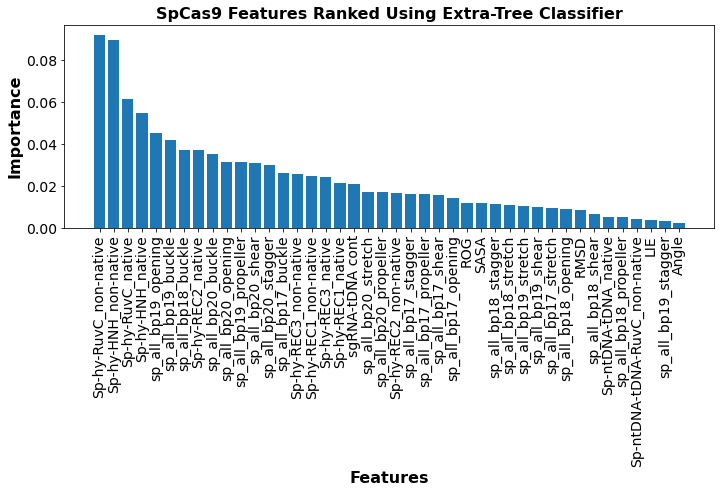

In [13]:
# Train the ExtraTreesClassifier model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
importances = model.feature_importances_

# Step 5: Visualize the feature importances
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features" ,fontsize=16, fontweight='bold')
plt.ylabel("Importance", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.title('SpCas9 Features Ranked Using Extra-Tree Classifier', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('../../figures/SpCas9_extra-tree-feature-ranking_all_plot.svg')
plt.show()

In [28]:
li1=list(X_train.columns[indices])
li2=list(importances[indices])
xt_imp=pd.DataFrame({'Feature':li1,'Importance':li2})
xt_imp.to_csv('xt_imp_spcas9.csv', index=False)

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 25 features
top_features = X.columns[indices][:20]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:   0%|                                                                                         | 0/5 [00:00<?, ?it/s]/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
Grid Search Progress:  20%|████████████████                                                                | 1/5 [01:44<06:56, 104.12s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9813399578483567



/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
Grid Search Progress:  40%|██████████████████████████████▊                                              | 2/5 [42:11<1:13:32, 1470.79s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9819532052472223



/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
Grid Search Progress:  60%|████████████████████████████████████████████████                                | 3/5 [42:50<27:14, 817.02s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.05, 'n_estimators': 50}
Best score for AdaBoostClassifier: 0.9134673540656474



/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
Grid Search Progress:  80%|████████████████████████████████████████████████████████████████                | 4/5 [44:39<08:57, 537.57s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.981427585866102



/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
Grid Search Progress: 100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [51:27<00:00, 617.57s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9819751110522607



In [75]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9831033307503706
Gradient Boosting Precision: 0.9834550136505444
AdaBoost Precision: 0.9059995845086058
Support Vector Machine Precision: 0.9819970864219276
XGBoost Precision: 0.9843729129439396
Random Forest Recall: 0.9829172141918529
Gradient Boosting Recall: 0.9832676303109943
AdaBoost Recall: 0.9097678493210688
Support Vector Machine Recall: 0.9818659658344284
XGBoost Recall: 0.9843188786684187
Random Forest F1-score: 0.9829168753392481
Gradient Boosting F1-score: 0.9833033355893254
AdaBoost F1-score: 0.9063417621611239
Support Vector Machine F1-score: 0.9818610603947456
XGBoost F1-score: 0.9843085171819046
Random Forest Accuracy: 0.9829172141918529
Gradient Boosting Accuracy: 0.9832676303109943
AdaBoost Accuracy: 0.9097678493210688
Support Vector Machine Accuracy: 0.9818659658344284
XGBoost Accuracy: 0.9843188786684187


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gayatrip/m

In [76]:
grid_et_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_et_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_et_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_et_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
et=pd.DataFrame(list(zip(models,grid_et_accuracy,grid_et_precision,grid_et_recall, grid_et_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
et.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.982917,0.983103,0.982917,0.982917
1,Gradient Boosting,0.983268,0.983455,0.983268,0.983303
2,ADA Boosting,0.909768,0.906000,0.909768,0.906342
3,Support-vector Machine,0.981866,0.981997,0.981866,0.981861
4,XG-Boost,0.984319,0.984373,0.984319,0.984309


In [77]:
rfe.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.982830,0.982906,0.982830,0.982829
1,Gradient Boosting,0.983618,0.983737,0.983618,0.983651
2,ADA Boosting,0.888217,0.887116,0.888217,0.881092
3,Support-vector Machine,0.976347,0.976339,0.976347,0.976323
4,XG-Boost,0.982567,0.982573,0.982567,0.982553


In [78]:
 

# Create a DataFrame with true labels and predictions
sp_et_all = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_et_all.to_csv('spcas9_et_both_dna-prot.csv', index=False)

### Bootstrapping Extra-Tree (both)

In [17]:
df_both_et = pd.read_csv('spcas9_et_both_dna-prot.csv')
metric_master_df_eval = get_test_metrics(df_both_et, df_both_et.columns[1:].to_list())
metric_master_df_eval.to_csv('extra-tree_bootstrap-both-dna-protein.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_both.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')
    


 Random Forest-Accuracy
Mean 0.9829986859395532
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.9831843235622438
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.9829986859395532
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.9829979470202773
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.9833823915900132
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.9835648477507939
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.9833823915900132
95 percent confidence interval Margin of 

In [26]:
 X.columns[indices][:25]

Index(['Sp-hy-HNH_non-native', 'Sp-hy-RuvC_non-native', 'Sp-hy-RuvC_native',
       'Sp-hy-HNH_native', 'sp_all_bp19_buckle', 'sp_all_bp19_opening',
       'Sp-hy-REC2_native', 'sp_all_bp20_buckle', 'sp_all_bp18_buckle',
       'sp_all_bp20_opening', 'sp_all_bp20_stagger', 'sp_all_bp19_propeller',
       'Sp-hy-REC3_non-native', 'sp_all_bp20_shear', 'Sp-hy-REC1_non-native',
       'Sp-hy-REC1_native', 'sp_all_bp17_buckle', 'Sp-hy-REC3_native',
       'sp_all_bp20_propeller', 'sgRNA-tDNA cont', 'sp_all_bp20_stretch',
       'sp_all_bp17_opening', 'sp_all_bp17_propeller', 'sp_all_bp17_stagger',
       'Sp-hy-REC2_non-native'],
      dtype='object')

## Feature selection and classification using Protein features only

In [17]:
prot=prot.drop(['Label','System','sys-labels'], axis=1)
prot.head()

,States,Angle,SASA,RMSD,ROG,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,0,103.3011,14157.2066,0.0000,38.5234,66,0,688,0,45,0,473,0,729,0
1,0,100.9966,13732.5256,3.9789,37.7180,50,40,522,142,30,5,366,167,500,269
2,0,101.1213,14321.8791,3.7594,38.0602,60,35,503,118,34,0,329,160,483,235
3,0,96.4444,13995.0482,4.0142,37.8444,53,36,466,105,35,15,356,165,536,279
4,0,98.1099,14417.0563,3.7774,38.0603,50,49,448,115,34,20,333,161,496,271


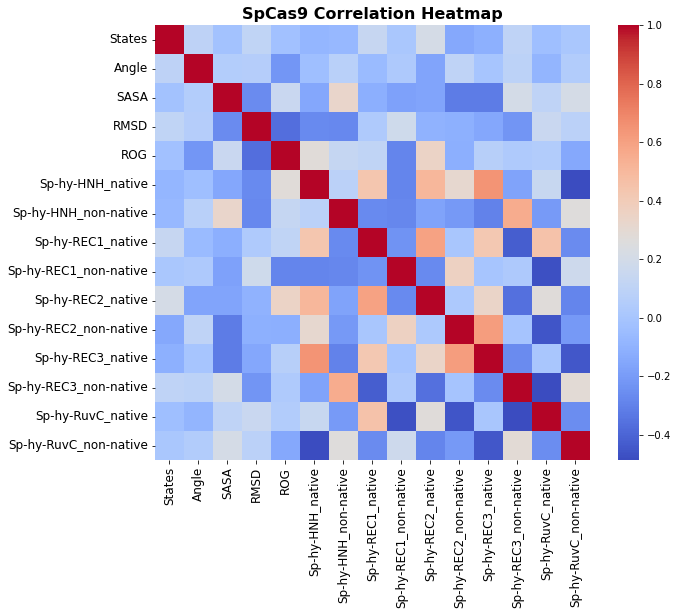

In [24]:
# Create a correlation matrix
correlation_matrix = prot.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('SpCas9 Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../../figures/SpCas9_prot_coor_plot.svg')
plt.show()

In [21]:
prot = prot.dropna()
 
# To reset the indices
prot = prot.reset_index(drop=True)
X = prot.iloc[:, 1:]  
y = prot['States']    # Assuming 'states' is the target variable column

# Split the prot into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_sp_prot = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=64)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_sp_prot[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [06:01<24:07, 361.97s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9085489593238482



Grid Search Progress:  40%|████████████████████████████▊                                           | 2/5 [2:30:58<4:23:14, 5264.86s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9110036222230073



Grid Search Progress:  60%|███████████████████████████████████████████▏                            | 3/5 [2:33:09<1:37:20, 2920.26s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.6431941157228221



Grid Search Progress:  80%|███████████████████████████████████████████████████████▏             | 4/5 [43:39:46<16:43:15, 60195.17s/it]

Best parameters for SVC: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.9103353733151918



Grid Search Progress: 100%|████████████████████████████████████████████████████████████████████████| 5/5 [44:02:28<00:00, 31709.77s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9107654469104602



In [24]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_sp_prot[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_sp_prot[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_sp_prot[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_sp_prot[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_sp_prot[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest recall:", rf_recall)
print("Gradient Boosting recall:", gb_recall)
print("AdaBoost recall:", ab_recall)
print("Support Vector Machine recall:", svm_recall)
print("XGBoost recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


grid_sp_prot_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_sp_prot_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_sp_prot_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_sp_prot_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
sp_prot=pd.DataFrame(list(zip(models,grid_sp_prot_accuracy,grid_sp_prot_precision,grid_sp_prot_recall, grid_sp_prot_f1)), 
                 columns=['Models','Accuracy','Precision','recall','F1-score'])
sp_prot.head()

Random Forest Precision: 0.906838609532692
Gradient Boosting Precision: 0.9099168937478412
AdaBoost Precision: 0.6342108111939632
Support Vector Machine Precision: 0.9091962200616238
XGBoost Precision: 0.9093470388246295
Random Forest recall: 0.9084846239347907
Gradient Boosting recall: 0.9111840364156036
AdaBoost recall: 0.6409252103953845
Support Vector Machine recall: 0.9105753453660086
XGBoost recall: 0.9109458529614143
Random Forest F1-score: 0.9063118331220202
Gradient Boosting F1-score: 0.9103043028841593
AdaBoost F1-score: 0.6301437047973325
Support Vector Machine F1-score: 0.9091653203140561
XGBoost F1-score: 0.9094001839188492
Random Forest Accuracy: 0.9084846239347907
Gradient Boosting Accuracy: 0.9111840364156036
AdaBoost Accuracy: 0.6409252103953845
Support Vector Machine Accuracy: 0.9105753453660086
XGBoost Accuracy: 0.9109458529614143


,Models,Accuracy,Precision,recall,F1-score
0,Random Forest,0.908485,0.906839,0.908485,0.906312
1,Gradient Boosting,0.911184,0.909917,0.911184,0.910304
2,ADA Boosting,0.640925,0.634211,0.640925,0.630144
3,Support-vector Machine,0.910575,0.909196,0.910575,0.909165
4,XG-Boost,0.910946,0.909347,0.910946,0.909400


In [87]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 151141 entries, 69628 to 121958
Series name: States
Non-Null Count   Dtype
--------------   -----
151141 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


## RFE using only Protein Features

In [88]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE


# Initialize the logistic regression model
model = RandomForestClassifier()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=20)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
Angle
SASA
RMSD
ROG
Sp-hy-HNH_native
Sp-hy-HNH_non-native
Sp-hy-REC1_native
Sp-hy-REC1_non-native
Sp-hy-REC2_native
Sp-hy-REC2_non-native
Sp-hy-REC3_native
Sp-hy-REC3_non-native
Sp-hy-RuvC_native
Sp-hy-RuvC_non-native


In [89]:
# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

In [90]:
# Random Forest
rf_model = RandomForestClassifier()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=10,n_jobs=100)
rf_grid.fit(X_train_scaled, y_train)
rf_best_model = rf_grid.best_estimator_

In [91]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}
gb_grid = GridSearchCV(gb_model, gb_params, cv=10,n_jobs=120)
gb_grid.fit(X_train_scaled, y_train)
gb_best_model = gb_grid.best_estimator_

In [92]:
# AdaBoost
ab_model = AdaBoostClassifier()
ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}
ab_grid = GridSearchCV(ab_model, ab_params, cv=10, n_jobs=120)
ab_grid.fit(X_train_scaled, y_train)
ab_best_model = ab_grid.best_estimator_

In [ ]:
# Support Vector Machine
svm_model = SVC()
svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm_model, svm_params, cv=10, n_jobs=64)
svm_grid.fit(X_train_scaled, y_train)
svm_best_model = svm_grid.best_estimator_


In [229]:
svm_best_model

SVC(C=100, gamma='auto')

In [ ]:
# XGBoost
xgb_model = XGBClassifier()
xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=64)
xgb_grid.fit(X_train_scaled, y_train)
xgb_best_model = xgb_grid.best_estimator_

In [237]:
grid_rfe_accuracy=[]
grid_rfe_f1=[]
grid_rfe_precision=[]
grid_rfe_recall=[]

# Make predictions on the test set using the best models
rf_pred = rf_best_model.predict(X_test_scaled)
gb_pred = gb_best_model.predict(X_test_scaled)
ab_pred = ab_best_model.predict(X_test_scaled)
svm_pred = svm_best_model.predict(X_test_scaled)
xgb_pred = xgb_best_model.predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Accuracy: 0.9077436087439793
Gradient Boosting Accuracy: 0.910813528820198
AdaBoost Accuracy: 0.6409252103953845
Support Vector Machine Accuracy: 0.9105753453660086
XGBoost Accuracy: 0.9109458529614143


In [238]:
# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

Random Forest Precision: 0.905919679094247
Gradient Boosting Precision: 0.9095491743361378
AdaBoost Precision: 0.6342108111939632
Support Vector Machine Precision: 0.9091962200616238
XGBoost Precision: 0.9093470388246295
Random Forest Recall: 0.9077436087439793
Gradient Boosting Recall: 0.910813528820198
AdaBoost Recall: 0.6409252103953845
Support Vector Machine Recall: 0.9105753453660086
XGBoost Recall: 0.9109458529614143
Random Forest F1-score: 0.9056467668860048
Gradient Boosting F1-score: 0.9099131317568491
AdaBoost F1-score: 0.6301437047973325
Support Vector Machine F1-score: 0.9091653203140561
XGBoost F1-score: 0.9094001839188492


In [239]:
grid_rfe_prot_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_prot_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_prot_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_prot_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe_prot=pd.DataFrame(list(zip(models,grid_rfe_prot_accuracy,grid_rfe_prot_precision,grid_rfe_prot_recall, grid_rfe_prot_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe_prot.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.907744,0.905920,0.907744,0.905647
1,Gradient Boosting,0.910814,0.909549,0.910814,0.909913
2,ADA Boosting,0.640925,0.634211,0.640925,0.630144
3,Support-vector Machine,0.910575,0.909196,0.910575,0.909165
4,XG-Boost,0.910946,0.909347,0.910946,0.909400


In [240]:
# Create a DataFrame with true labels and predictions
sp_rfe_prot = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_rfe_prot.to_csv('spcas9_rfe-prot.csv', index=False)

In [19]:
df_prot_rfe = pd.read_csv('spcas9_rfe-prot.csv')
metric_master_df_eval = get_test_metrics(df_prot_rfe, df_prot_rfe.columns[1:].to_list())
metric_master_df_eval.to_csv('rfe_bootstrap-protein.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_prot_rfe.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')


 Random Forest-Accuracy
Mean 0.9076255756100143
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.9057868355455193
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.9076255756100143
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.9055196179285877
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.9106076324564654
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.9093746287891691
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.9106076324564654
95 percent confidence interval Margin of 

## Extra-tree Classifier using only Protein Features

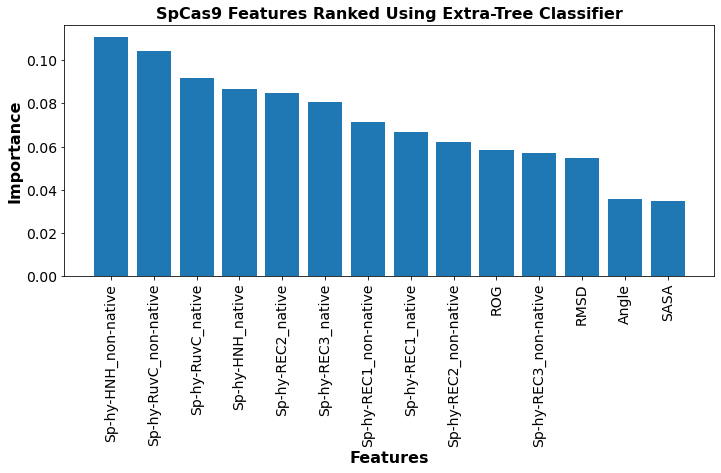

In [26]:
# Train the ExtraTreesClassifier model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
importances = model.feature_importances_

# Step 5: Visualize the feature importances
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features" ,fontsize=16, fontweight='bold')
plt.ylabel("Importance", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.title('SpCas9 Features Ranked Using Extra-Tree Classifier', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('../../figures/SpCas9_extra-tree-feature-ranking_prot_plot.svg')
plt.show()

In [242]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 25 features
top_features = X.columns[indices][:5]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|████████████████                                                                | 1/5 [03:07<12:30, 187.58s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.8368344960262529



Grid Search Progress:  40%|██████████████████████████████▊                                              | 2/5 [51:29<1:29:13, 1784.44s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.8354318203814426



Grid Search Progress:  60%|████████████████████████████████████████████████                                | 3/5 [52:31<33:15, 997.60s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.1, 'n_estimators': 200}
Best score for AdaBoostClassifier: 0.619937672060408



Grid Search Progress:  80%|█████████████████████████████████████████████████████████▌              | 4/5 [30:31:56<11:52:33, 42753.48s/it]

Best parameters for SVC: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.8272143161963564



Grid Search Progress: 100%|███████████████████████████████████████████████████████████████████████████| 5/5 [30:41:44<00:00, 22100.85s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for XGBClassifier: 0.8373968845704175



In [243]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.8293049261782435
Gradient Boosting Precision: 0.8268585834776747
AdaBoost Precision: 0.5695580988615114
Support Vector Machine Precision: 0.8175255416352176
XGBoost Precision: 0.8307342804280289
Random Forest Recall: 0.8341978510559467
Gradient Boosting Recall: 0.8323717779071614
AdaBoost Recall: 0.613269464881173
Support Vector Machine Recall: 0.825041020483777
XGBoost Recall: 0.8356798814375694
Random Forest F1-score: 0.8296616033676053
Gradient Boosting F1-score: 0.8281675214437935
AdaBoost F1-score: 0.5633879400866929
Support Vector Machine F1-score: 0.815551286743685
XGBoost F1-score: 0.8312510669008512
Random Forest Accuracy: 0.8341978510559467
Gradient Boosting Accuracy: 0.8323717779071614
AdaBoost Accuracy: 0.613269464881173
Support Vector Machine Accuracy: 0.825041020483777
XGBoost Accuracy: 0.8356798814375694


In [244]:
grid_et_prot_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_et_prot_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_et_prot_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_et_prot_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
et_prot=pd.DataFrame(list(zip(models,grid_et_prot_accuracy,grid_et_prot_precision,grid_et_prot_recall, grid_et_prot_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
et_prot.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.834198,0.829305,0.834198,0.829662
1,Gradient Boosting,0.832372,0.826859,0.832372,0.828168
2,ADA Boosting,0.613269,0.569558,0.613269,0.563388
3,Support-vector Machine,0.825041,0.817526,0.825041,0.815551
4,XG-Boost,0.835680,0.830734,0.835680,0.831251


In [245]:
# Create a DataFrame with true labels and predictions
sp_et_prot = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_et_prot.to_csv('spcas9_et-prot.csv', index=False)

In [20]:
df_prot_et = pd.read_csv('spcas9_et-prot.csv')
metric_master_df_eval = get_test_metrics(df_prot_et, df_prot_et.columns[1:].to_list())
metric_master_df_eval.to_csv('et_bootstrap-protein.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_prot_et.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')


 Random Forest-Accuracy
Mean 0.8341541840893453
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.8293014880334799
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.8341541840893453
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.8296472177938102
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.8323373736304451
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.8269010266696685
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.8323373736304451
95 percent confidence interval Margin of 

## Feature selection and classification using DNA features only

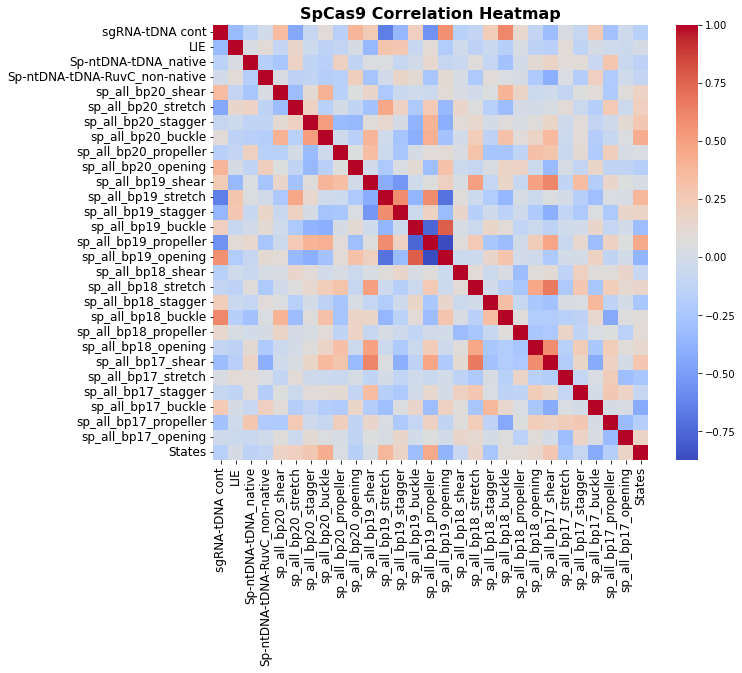

In [9]:
# Create a correlation matrix
correlation_matrix = dna_2.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title('SpCas9 Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../../figures/SpCas9_dna_coor_plot.svg')
plt.show()

In [10]:
dna_2 = dna_2.dropna()
 
# To reset the indices
dna_2 = dna_2.reset_index(drop=True)
X = dna_2.iloc[:, :-1]  
y = dna_2['States']    # Assuming 'states' is the target variable column

# Split the prot into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train.columns

Index(['sgRNA-tDNA cont', 'LIE', 'Sp-ntDNA-tDNA_native',
       'Sp-ntDNA-tDNA-RuvC_non-native', 'sp_all_bp20_shear',
       'sp_all_bp20_stretch', 'sp_all_bp20_stagger', 'sp_all_bp20_buckle',
       'sp_all_bp20_propeller', 'sp_all_bp20_opening', 'sp_all_bp19_shear',
       'sp_all_bp19_stretch', 'sp_all_bp19_stagger', 'sp_all_bp19_buckle',
       'sp_all_bp19_propeller', 'sp_all_bp19_opening', 'sp_all_bp18_shear',
       'sp_all_bp18_stretch', 'sp_all_bp18_stagger', 'sp_all_bp18_buckle',
       'sp_all_bp18_propeller', 'sp_all_bp18_opening', 'sp_all_bp17_shear',
       'sp_all_bp17_stretch', 'sp_all_bp17_stagger', 'sp_all_bp17_buckle',
       'sp_all_bp17_propeller', 'sp_all_bp17_opening'],
      dtype='object')

In [12]:
# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict_sp_dna = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=48)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict_sp_dna[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [02:58<11:54, 178.63s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.9717251948901806



Grid Search Progress:  40%|████████████████████████████▊                                           | 2/5 [1:23:46<2:26:16, 2925.48s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9736525411165629



Grid Search Progress:  60%|████████████████████████████████████████████▍                             | 3/5 [1:24:30<53:39, 1609.57s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.05, 'n_estimators': 50}
Best score for AdaBoostClassifier: 0.8151949621446004



Grid Search Progress:  80%|███████████████████████████████████████████████████████████▏              | 4/5 [1:31:28<18:58, 1138.98s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.971374783568631



Grid Search Progress: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [1:40:23<00:00, 1204.60s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9735649370867774



In [13]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict_sp_dna[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict_sp_dna[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict_sp_dna[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict_sp_dna[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict_sp_dna[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9712322644897217
Gradient Boosting Precision: 0.9728175880954686
AdaBoost Precision: 0.8448429694774022
Support Vector Machine Precision: 0.9722002785832805
XGBoost Precision: 0.9747954615652457
Random Forest Recall: 0.9710030661410425
Gradient Boosting Recall: 0.9724923346473938
AdaBoost Recall: 0.8113885238720981
Support Vector Machine Recall: 0.9721419185282523
XGBoost Recall: 0.974682435392028
Random Forest F1-score: 0.9710798383817869
Gradient Boosting F1-score: 0.9726284740589202
AdaBoost F1-score: 0.8042909659419581
Support Vector Machine F1-score: 0.9721566685934644
XGBoost F1-score: 0.9747184999446712
Random Forest Accuracy: 0.9710030661410425
Gradient Boosting Accuracy: 0.9724923346473938
AdaBoost Accuracy: 0.8113885238720981
Support Vector Machine Accuracy: 0.9721419185282523
XGBoost Accuracy: 0.974682435392028


In [14]:
sp_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
sp_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
sp_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
sp_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
sel_sp_dna=pd.DataFrame(list(zip(models,sp_dna_accuracy,sp_dna_precision,sp_dna_recall, sp_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
sel_sp_dna.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.971003,0.971232,0.971003,0.971080
1,Gradient Boosting,0.972492,0.972818,0.972492,0.972628
2,ADA Boosting,0.811389,0.844843,0.811389,0.804291
3,Support-vector Machine,0.972142,0.972200,0.972142,0.972157
4,XG-Boost,0.974682,0.974795,0.974682,0.974718


In [15]:
X_train

,sgRNA-tDNA cont,LIE,Sp-ntDNA-tDNA_native,Sp-ntDNA-tDNA-RuvC_non-native,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,...,sp_all_bp18_stagger,sp_all_bp18_buckle,sp_all_bp18_propeller,sp_all_bp18_opening,sp_all_bp17_shear,sp_all_bp17_stretch,sp_all_bp17_stagger,sp_all_bp17_buckle,sp_all_bp17_propeller,sp_all_bp17_opening
12376,429.0,-204.4527,393,147,-2.6497,1.4113,0.0046,-15.7034,28.4407,50.5611,...,-0.4297,1.8318,0.3302,-0.3295,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
13378,489.0,-229.8273,370,109,-2.7232,-0.9759,-2.3375,-10.7570,29.4455,-4.5605,...,-0.8751,24.3439,19.8002,0.5782,0.0649,-0.0185,-0.3166,-4.3523,22.4593,-4.7204
51994,167.0,-119.7397,428,65,7.5700,2.0700,0.7300,-28.3100,54.3700,25.8400,...,-0.1800,-29.7100,1.6200,1.7900,0.5100,-0.6000,1.7400,15.3300,17.8600,34.6000
20730,497.0,-171.7291,380,109,-1.3308,0.7609,-3.2261,-32.2946,43.2544,20.0254,...,-0.6519,17.4419,8.2497,-9.2309,-0.5965,-0.0455,-0.3326,1.1491,19.1110,-11.9610
7094,414.0,-220.6328,359,95,-1.9022,-0.5990,-0.6967,-5.0736,35.8462,-5.9048,...,-0.0269,-17.2438,9.9631,-3.3616,-0.3933,0.0079,0.1874,-2.2517,-6.6646,-2.6103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,201.0,-171.8091,380,78,-2.9000,-0.1200,1.1800,-1.1200,40.5200,16.6800,...,-0.4800,-32.2700,-9.0800,72.2900,2.8100,0.1300,-0.4400,-20.8100,7.9100,-14.1900
38158,564.0,-233.3530,387,101,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.8273,37.5899,12.6189,3.5908,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
860,446.0,-195.5041,377,109,-2.2241,-0.5242,-0.6279,-29.8500,-21.9172,-8.1791,...,0.6195,2.7500,-1.0062,-4.0679,-0.0558,0.0319,0.3454,17.6194,23.7578,-5.1824
15795,434.0,-207.7613,376,117,-2.5066,1.1564,-1.1666,-25.5739,24.3664,41.9484,...,-0.1467,12.7650,24.2016,0.5332,0.0416,0.1048,-0.6713,-0.1105,15.1481,-4.5101


In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE


# Initialize the logistic regression model
model = RandomForestClassifier()

# Initialize the RFE object
rfe = RFE(estimator=model, n_features_to_select=20)

# Perform RFE feature selection
X_selected = rfe.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
sgRNA-tDNA cont
sp_all_bp20_shear
sp_all_bp20_stretch
sp_all_bp20_stagger
sp_all_bp20_buckle
sp_all_bp20_propeller
sp_all_bp20_opening
sp_all_bp19_shear
sp_all_bp19_buckle
sp_all_bp19_propeller
sp_all_bp19_opening
sp_all_bp18_shear
sp_all_bp18_stretch
sp_all_bp18_stagger
sp_all_bp18_buckle
sp_all_bp17_shear
sp_all_bp17_stagger
sp_all_bp17_buckle
sp_all_bp17_propeller
sp_all_bp17_opening


In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 20 features
top_features = selected_feature_names
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]


# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)


# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [01:48<07:14, 108.54s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.9702577458322118



Grid Search Progress:  40%|█████████████████████████████▌                                            | 2/5 [46:27<1:21:02, 1620.75s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for GradientBoostingClassifier: 0.9713090997366602



Grid Search Progress:  60%|██████████████████████████████████████████████▏                              | 3/5 [47:11<30:01, 900.81s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.05, 'n_estimators': 100}
Best score for AdaBoostClassifier: 0.839330395287997



Grid Search Progress:  80%|█████████████████████████████████████████████████████████████▌               | 4/5 [51:57<10:57, 657.96s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best score for SVC: 0.9692065310579313



Grid Search Progress: 100%|█████████████████████████████████████████████████████████████████████████████| 5/5 [59:01<00:00, 708.30s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9712214957068749



In [18]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9700097429876297
Gradient Boosting Precision: 0.9715282315709484
AdaBoost Precision: 0.8459539058768374
Support Vector Machine Precision: 0.9702326388682186
XGBoost Precision: 0.9715378374725949
Random Forest Recall: 0.9697766097240473
Gradient Boosting Recall: 0.9712658782303986
AdaBoost Recall: 0.8305738063950941
Support Vector Machine Recall: 0.9701270258431888
XGBoost Recall: 0.9713534822601839
Random Forest F1-score: 0.9698571268395029
Gradient Boosting F1-score: 0.9713678378862507
AdaBoost F1-score: 0.8289457576481676
Support Vector Machine F1-score: 0.9701387287983475
XGBoost F1-score: 0.9714183824112608
Random Forest Accuracy: 0.9697766097240473
Gradient Boosting Accuracy: 0.9712658782303986
AdaBoost Accuracy: 0.8305738063950941
Support Vector Machine Accuracy: 0.9701270258431888
XGBoost Accuracy: 0.9713534822601839


In [19]:
grid_rfe_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_rfe_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_rfe_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_rfe_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
rfe_dna=pd.DataFrame(list(zip(models,grid_rfe_dna_accuracy,grid_rfe_dna_precision,grid_rfe_dna_recall, grid_rfe_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
rfe_dna.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.969777,0.970010,0.969777,0.969857
1,Gradient Boosting,0.971266,0.971528,0.971266,0.971368
2,ADA Boosting,0.830574,0.845954,0.830574,0.828946
3,Support-vector Machine,0.970127,0.970233,0.970127,0.970139
4,XG-Boost,0.971353,0.971538,0.971353,0.971418


In [254]:
# Create a DataFrame with true labels and predictions
sp_rfe_dna = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_rfe_dna.to_csv('spcas9_rfe-dna.csv', index=False)

In [21]:
df_dna_rfe = pd.read_csv('spcas9_rfe-dna.csv')
metric_master_df_eval = get_test_metrics(df_dna_rfe, df_dna_rfe.columns[1:].to_list())
metric_master_df_eval.to_csv('rfe_bootstrap-dna.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_dna_rfe.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')


 Random Forest-Accuracy
Mean 0.9697818659658344
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Precision
Mean 0.9700070380041305
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-Recall
Mean 0.9697818659658344
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Random Forest-F1 score
Mean 0.9698559643032525
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Accuracy
Mean 0.9703600525624179
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Precision
Mean 0.9705440457010291
95 percent confidence interval Margin of error = 0.000

--------------------------------------------

 Gradient Boosting-Recall
Mean 0.9703600525624179
95 percent confidence interval Margin of 

## Extra-tree Classifier using only DNA Features

In [ ]:
# Train the ExtraTreesClassifier model
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Extract feature importances
importances = model.feature_importances_

# Step 5: Visualize the feature importances
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

plt.title('Feature Importances', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('../../figures/SpCas9_dna_extra-tree-ranking.svg')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

# Select the top 25 features
top_features = X.columns[indices][:25]
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]



# Scale the top features data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_top)
X_test_scaled = scaler.transform(X_test_top)

# Initialize the models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10]
}

ab_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

svm_params = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

xgb_params = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Create a list of models and parameter grids
models = [rf_model, gb_model, ab_model, svm_model, xgb_model]
param_grids = [rf_params, gb_params, ab_params, svm_params, xgb_params]

# Create an empty dictionary to store best parameters
best_params_dict = {}

# Perform grid search with tqdm progress bar
for model, param_grid in tqdm(zip(models, param_grids), total=len(models), desc='Grid Search Progress'):
    grid = GridSearchCV(model, param_grid, cv=10, n_jobs=100)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    # Store the best parameters in the dictionary
    best_params_dict[model] = best_model
    
    # Print the best parameters and best score for the current model
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")
    print()


Grid Search Progress:  20%|███████████████▍                                                             | 1/5 [02:33<10:13, 153.45s/it]

Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best score for RandomForestClassifier: 0.9713090997366601



Grid Search Progress:  40%|█████████████████████████████▌                                            | 2/5 [53:50<1:33:38, 1873.00s/it]

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best score for GradientBoostingClassifier: 0.9726231985641768



Grid Search Progress:  60%|█████████████████████████████████████████████▌                              | 3/5 [54:34<34:36, 1038.22s/it]

Best parameters for AdaBoostClassifier: {'learning_rate': 0.05, 'n_estimators': 50}
Best score for AdaBoostClassifier: 0.8146912149853746



Grid Search Progress:  80%|████████████████████████████████████████████████████████████               | 4/5 [1:01:28<13:11, 791.71s/it]

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVC: 0.9703015958230244



Grid Search Progress: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [1:23:59<00:00, 1007.83s/it]

Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score for XGBClassifier: 0.9731488131477048



In [23]:
# Make predictions on the test set using the best models
rf_pred = best_params_dict[rf_model].predict(X_test_scaled)
gb_pred = best_params_dict[gb_model].predict(X_test_scaled)
ab_pred = best_params_dict[ab_model].predict(X_test_scaled)
svm_pred = best_params_dict[svm_model].predict(X_test_scaled)
xgb_pred = best_params_dict[xgb_model].predict(X_test_scaled)

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
ab_accuracy = accuracy_score(y_test, ab_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for each model
rf_precision = precision_score(y_test, rf_pred, average='weighted')
gb_precision = precision_score(y_test, gb_pred, average='weighted')
ab_precision = precision_score(y_test, ab_pred, average='weighted')
svm_precision = precision_score(y_test, svm_pred, average='weighted')
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for each model
rf_recall = recall_score(y_test, rf_pred, average='weighted')
gb_recall = recall_score(y_test, gb_pred, average='weighted')
ab_recall = recall_score(y_test, ab_pred, average='weighted')
svm_recall = recall_score(y_test, svm_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1-score for each model
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
gb_f1 = f1_score(y_test, gb_pred, average='weighted')
ab_f1 = f1_score(y_test, ab_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Print the precision scores
print("Random Forest Precision:", rf_precision)
print("Gradient Boosting Precision:", gb_precision)
print("AdaBoost Precision:", ab_precision)
print("Support Vector Machine Precision:", svm_precision)
print("XGBoost Precision:", xgb_precision)

# Print the recall scores
print("Random Forest Recall:", rf_recall)
print("Gradient Boosting Recall:", gb_recall)
print("AdaBoost Recall:", ab_recall)
print("Support Vector Machine Recall:", svm_recall)
print("XGBoost Recall:", xgb_recall)

# Print the F1-scores
print("Random Forest F1-score:", rf_f1)
print("Gradient Boosting F1-score:", gb_f1)
print("AdaBoost F1-score:", ab_f1)
print("Support Vector Machine F1-score:", svm_f1)
print("XGBoost F1-score:", xgb_f1)

# Print the accuracies
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("AdaBoost Accuracy:", ab_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Random Forest Precision: 0.9704444932511327
Gradient Boosting Precision: 0.9719379375117485
AdaBoost Precision: 0.8430484407284776
Support Vector Machine Precision: 0.9713721435254765
XGBoost Precision: 0.973598123960418
Random Forest Recall: 0.9702146298729741
Gradient Boosting Recall: 0.9716162943495401
AdaBoost Recall: 0.8081471747700394
Support Vector Machine Recall: 0.9713534822601839
XGBoost Recall: 0.9734559789750329
Random Forest F1-score: 0.9702928474633916
Gradient Boosting F1-score: 0.9717533251503344
AdaBoost F1-score: 0.801479759580492
Support Vector Machine F1-score: 0.9713524258817092
XGBoost F1-score: 0.973501849277606
Random Forest Accuracy: 0.9702146298729741
Gradient Boosting Accuracy: 0.9716162943495401
AdaBoost Accuracy: 0.8081471747700394
Support Vector Machine Accuracy: 0.9713534822601839
XGBoost Accuracy: 0.9734559789750329


In [24]:
grid_et_dna_accuracy=[rf_accuracy,gb_accuracy,ab_accuracy,svm_accuracy,xgb_accuracy]
grid_et_dna_precision=[rf_precision,gb_precision,ab_precision,svm_precision,xgb_precision]
grid_et_dna_recall=[rf_recall,gb_recall,ab_recall,svm_recall,xgb_recall]
grid_et_dna_f1=[rf_f1,gb_f1,ab_f1,svm_f1,xgb_f1]
models=['Random Forest','Gradient Boosting','ADA Boosting','Support-vector Machine','XG-Boost']
et_dna=pd.DataFrame(list(zip(models,grid_et_dna_accuracy,grid_et_dna_precision,grid_et_dna_recall, grid_et_dna_f1)), 
                 columns=['Models','Accuracy','Precision','Recall','F1-score'])
et_dna.head()

,Models,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.970215,0.970444,0.970215,0.970293
1,Gradient Boosting,0.971616,0.971938,0.971616,0.971753
2,ADA Boosting,0.808147,0.843048,0.808147,0.801480
3,Support-vector Machine,0.971353,0.971372,0.971353,0.971352
4,XG-Boost,0.973456,0.973598,0.973456,0.973502


In [25]:
# Create a DataFrame with true labels and predictions
sp_et_dna = pd.DataFrame({'True Label': y_test,
                               'Random Forest': rf_pred,
                               'Gradient Boosting': gb_pred,
                               'AdaBoost': ab_pred,
                               'SVM': svm_pred,
                               'XGBoost': xgb_pred})

# Display the DataFrame
sp_et_dna.to_csv('spcas9_et-dna.csv', index=False)

In [26]:
df_dna_rfe = pd.read_csv('spcas9_et-dna.csv')
metric_master_df_eval = get_test_metrics(df_dna_rfe, df_dna_rfe.columns[1:].to_list())
metric_master_df_eval.to_csv('et_bootstrap-dna.csv', index=False)
for model in metric_master_df_eval.columns.to_list():
    
    print("\n", model)

    bootstrap_mean = statistics.mean(metric_master_df_eval[model])
    print('Mean', bootstrap_mean)

    alpha = 0.95
    z = 1.96

    margin_of_error = z * (np.std(metric_master_df_eval[model])/np.sqrt(df_dna_rfe.shape[0]))
    u = bootstrap_mean + margin_of_error
    l = bootstrap_mean - margin_of_error
    print('95 percent confidence interval Margin of error = %.3f' % (margin_of_error))
    print('\n--------------------------------------------')

NameError: name 'get_test_metrics' is not defined

In [ ]:
X_train_scaled

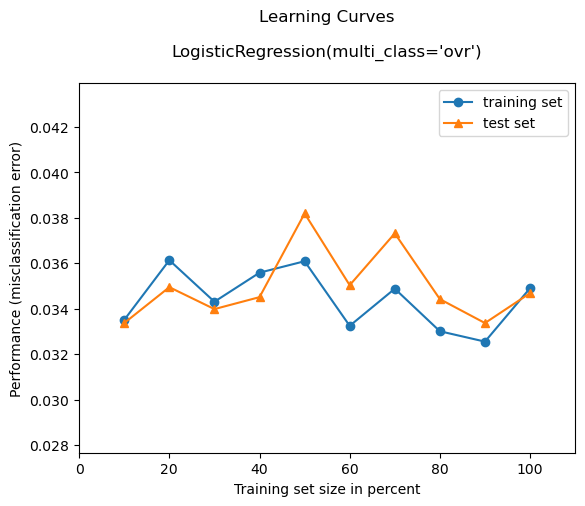

In [41]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


# Loading some example data
# X, y = mnist_data()
# X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=123)
# X_train, X_test = X[:4000], X[4000:]
# y_train, y_test = y[:4000], y[4000:]


logreg = LogisticRegression(multi_class='ovr')
#clf = KNeighborsClassifier(n_neighbors=7)

plot_learning_curves(X_train, y_train, X_test, y_test, logreg)
plt.show()

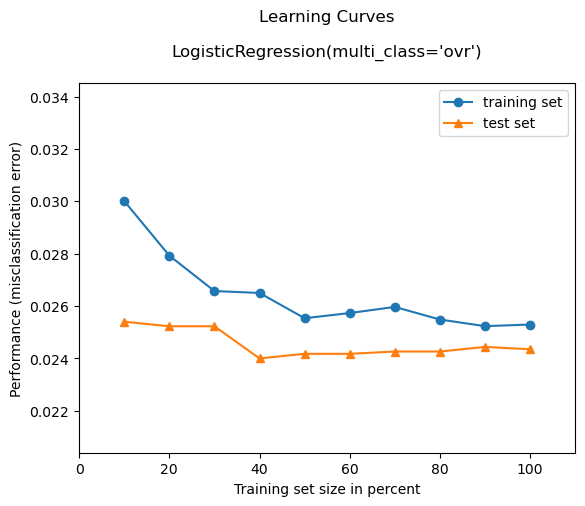

In [43]:
logreg = LogisticRegression(multi_class='ovr')
#clf = KNeighborsClassifier(n_neighbors=7)

plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, logreg)
plt.show()

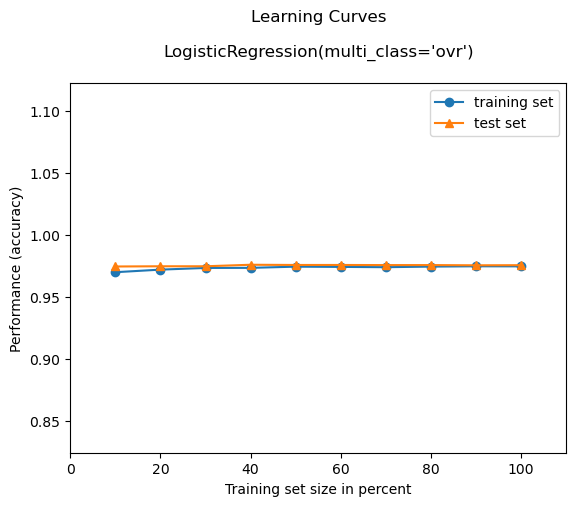

In [47]:
logreg = LogisticRegression(multi_class='ovr')
#clf = KNeighborsClassifier(n_neighbors=7)

plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, logreg, scoring="accuracy")
plt.show()